Histogram and kernel density estimate

In [19]:
import numpy as np
import scipy.stats

In [10]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

Introduction:

Histogram is used to count the occurrances of the values in a given data set. It's convenient and widely used. However, it also has sveral limitations, for example, the results highly depend on the bin size and the locations of the bins. Also, it'sdiscretized on a given values, but very often the variable is continuous in nature. Therefore, kernel density estimate (KDE) provides a non-parametric way to estimate the probability density function (pdf) of the underlying random variable. 
See: https://en.wikipedia.org/wiki/Kernel_density_estimation 

Below we use exactly the same data set as the above Wiki page to demonstrate. We use 6 bins with binWidth = 2, for the following 6 data points: 
$ x_1 = −2.1,\hspace{1pt} x_2 = −1.3,\hspace{1pt} x_3 = −0.4,\hspace{1pt} x_4 = 1.9,\hspace{1pt} x_5 = 5.1,\hspace{1pt} x_6 = 6.2 $

In [2]:
data = [-2.1, -1.3, -0.4, 1.9, 5.1, 6.2]

First we will use histogram approach to count the data, and then use KDE appraoch. 

To construct the histogram, the idea is the following: 

1) for the given set of bins (determined by the bin size and the starting location of the bin), if a data point falls into a bin, we place a box in that bin. 

2) we want the histogram to be normalized such that the total area under the histogram is 1. 

To achieve this, we need the height of the bin to be: binHeight = 1/(N * binWidth), where N is the total number of data points

In [3]:
N = len(data)
nBins = 6
binWidth = 2
binHeight = 1.0/(N * binWidth)

For simplicity, we will use the following predetermined edges for the bins

In [6]:
edges = np.arange(-4, 8.1, 2)
print(edges)

[-4. -2.  0.  2.  4.  6.  8.]


Also, for the purpose of better visualization, we want the boxes to be placed on center of the bins, so we compute the centers: (notice that there are 6 centers corresponding to 6 bins)

In [12]:
centers =(edges[0:-1] + edges[1:])/2.0
print(centers)

[-3. -1.  1.  3.  5.  7.]


We use numpy's histogram function to construct the histogram. The bins are determined by the edges defined above. Notice that there are 7 edges, which define 6 bins. 

In [8]:
counts, edges2 = np.histogram(data, edges)
print(counts)
print(edges2)

[1 2 1 0 1 1]
[-4. -2.  0.  2.  4.  6.  8.]


The histogram can be plotted as the following:

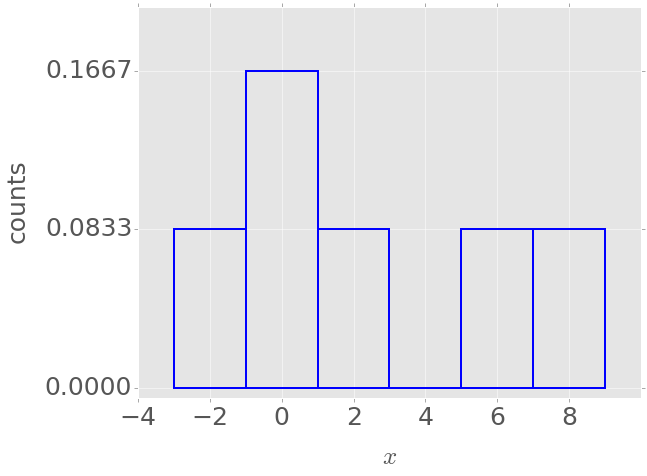

In [18]:
plt.close('all')
FONTSIZE = 25

x = centers
y = binHeight * counts

fig, ax = plt.subplots(1, figsize=(9,7))
p = ax.bar(x, y, width=binWidth, fill=False, edgecolor='b', lw=2)

XMIN = 0.9*np.min(data)
XMAX = 1.3*np.max(data)
YMIN = -0.005
YMAX = 1.2 * np.max(y)
ax.set_ylim(YMIN, YMAX)
ax.xaxis.set_ticks(edges)
ax.yaxis.set_ticks(np.arange(0, YMAX, binHeight))
ax.set_xlabel(r'$x$', fontsize=FONTSIZE, labelpad=15)    
ax.set_ylabel('counts', fontsize=FONTSIZE, labelpad=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE) 
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE) 
    tick.label.set_rotation(0)  

In KDE approach, instead of placing a box, we use a smoothing "kernel" to represent a data point. The most commonly used kernel is the Guassian kernel. In this example, each kernel is a Gaussian distribution with $\mu = x_i$ and $\sigma$ determined by bandwith selection that is enough to smooth the data but won't cause overfitting. Here we choose $\sigma=\sqrt{2.25}$. Below we plot the individual kernels as well as the resulting pdf, which is the sum of all the individual kernels. 

In [20]:
def computeValue(x):
    y = 0
    for i in range(len(gaussians)):
        y += gaussians[i].pdf(x)
    return y

std = np.sqrt(2.25)
gaussians = [scipy.stats.norm(loc=x, scale=std) for x in data]

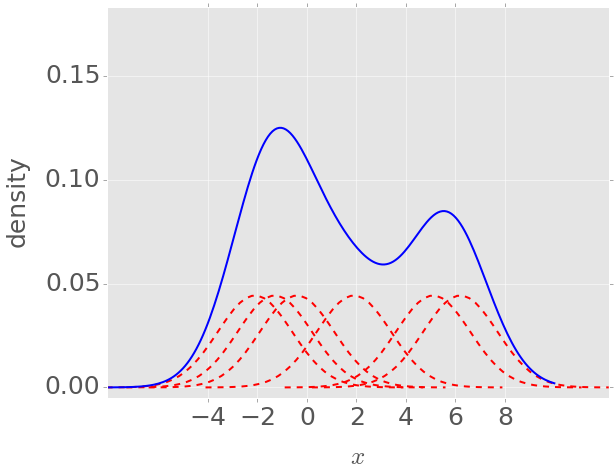

In [22]:
plt.close('all')
FONTSIZE = 25
fig, ax = plt.subplots(1, figsize=(9, 7))

XMIN = 0.9*np.min(data)
XMAX = 1.3*np.max(data)
YMIN = -0.005
YMAX = 1.1 * np.max(y)

ax.set_ylim(YMIN, YMAX)
ax.xaxis.set_ticks(edges)
ax.yaxis.set_ticks(np.arange(0, YMAX, 0.05))
ax.set_xlabel(r'$x$', fontsize=FONTSIZE, labelpad=15)    
ax.set_ylabel('density', fontsize=FONTSIZE, labelpad=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE) 
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE) 
    tick.label.set_rotation(0)   

# plot individual kernels
for i in range(len(data)):
    xs = np.linspace(data[i]-3*binWidth, data[i]+3*binWidth, 50)
    ys = gaussians[i].pdf(xs)/len(data)
    p, = ax.plot(xs, ys, linestyle='--', lw=2, color='r')

# plot the pdf obtained by KDE estimate    
xs = np.linspace(-8, 10, 200)    
ys = [computeValue(x)/len(data) for x in xs]
p, = ax.plot(xs, ys, linestyle='-', lw=2, color='b')
    